In [3]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

## Get the data and data cleaning

    - read in the data
    - fix the column headers
    - drop extraneous data
    - drop nulls
    - drop pesky row

In [19]:
# read the csv file
df = pd.read_csv('./penguins_lter.csv')

In [20]:
# first check
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [22]:
# fix column names
df.columns = [x.lower().strip().replace(' ','') for x in df.columns]

In [23]:
# Check!
df.head()

,studyname,samplenumber,species,region,island,stage,individualid,clutchcompletion,dateegg,culmenlength(mm),culmendepth(mm),flipperlength(mm),bodymass(g),sex,delta15n(o/oo),delta13c(o/oo),comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [6]:
# drop extraneous columns
df.drop(columns=['studyname','samplenumber','species','region','stage','individualid','clutchcompletion','dateegg',
                 'delta15n(o/oo)','delta13c(o/oo)','comments'], inplace=True)

In [7]:
# fix the column names
df.columns = ['island', 'culmenlength', 'culmendepth', 'flipperlength','bodymass', 'sex']

In [8]:
# drop nulls and odd data point (sex = '.')
df.dropna(inplace=True)
df.drop(336, inplace=True)

In [9]:
# Sanity Check!
df.head()

,island,culmenlength,culmendepth,flipperlength,bodymass,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Data Prep for machine learning

Now that we have all our data, and it has been cleaned, we need to prep it for machine learning. For this dataset, we just need to one-hot-encode our categoricals

In [10]:
# One Hot Encode the categorical variables
ohe_df = pd.get_dummies(df)

# Sanity Check!
ohe_df.head()

,culmenlength,culmendepth,flipperlength,bodymass,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True


## Modeling

Since we don't know how many clusters, we'll step through a range of 2 to 10.

We will capture the inertia and Silhouette scores for each cluster so we can graph them

In [11]:
# Loop through 2-10 clusters, capturing inertia and Silhouette

sil_score = []
in_score = []

for i in range(2,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(ohe_df)
    in_score.append(k_means.inertia_)
    sil_score.append(silhouette_score(ohe_df, k_means.labels_))

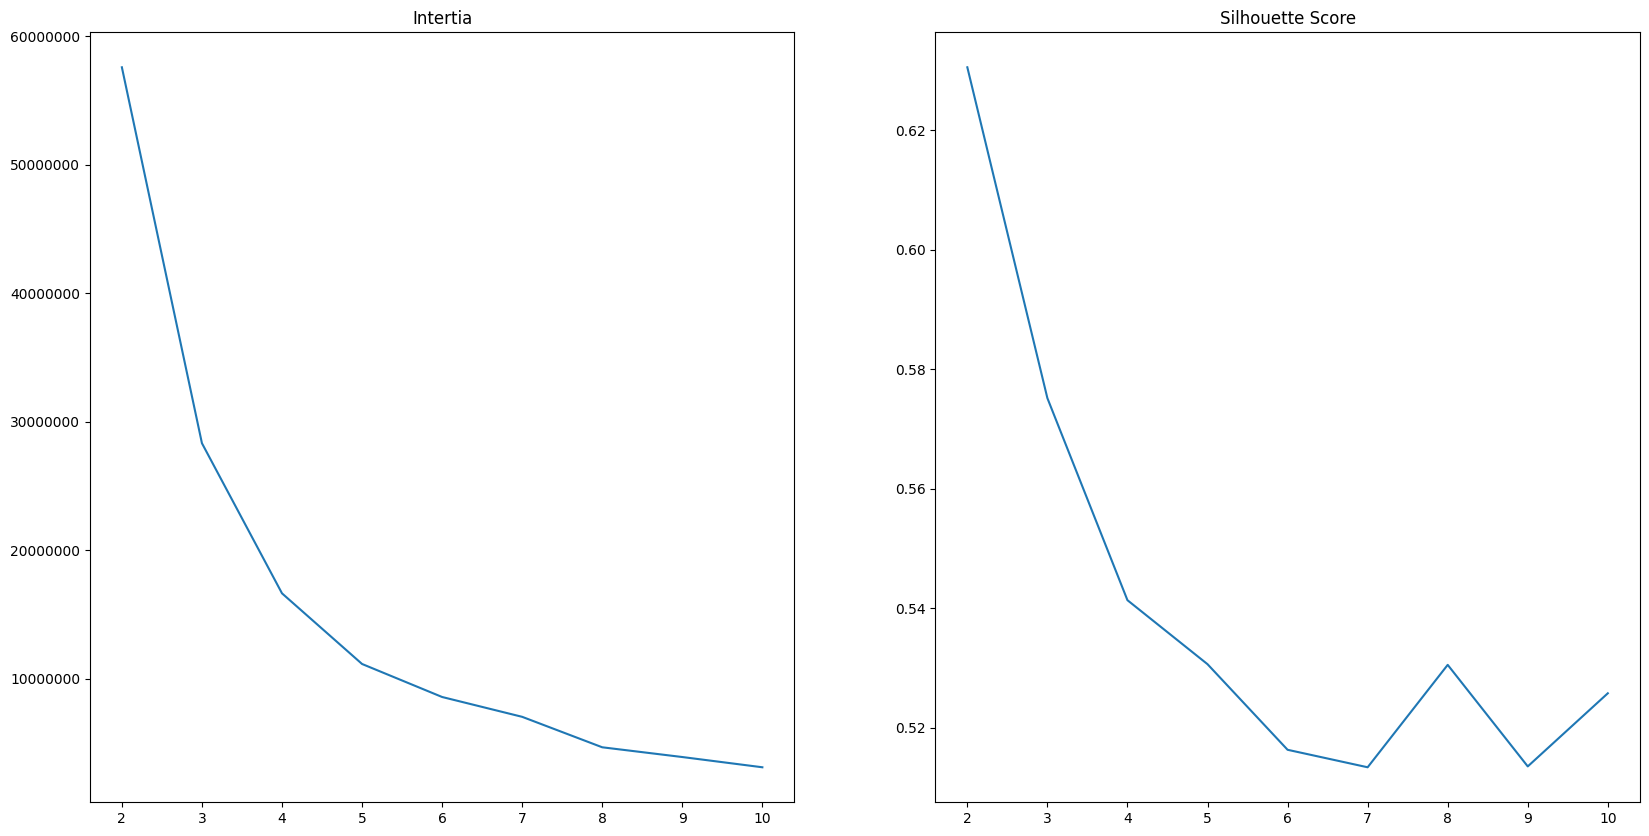

In [12]:
# Graph it!
fix, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.ticklabel_format(style='plain')
ax1.plot(range(2,11),in_score)
ax2.plot(range(2,11),sil_score)
ax1.set_title( 'Intertia')
ax2.set_title('Silhouette Score');


## Interpretation

We know there are more than two kinds of penguins running around, so we can't choose that for our cluster number.

Reading the Elbow plot (inertia), there is a change at both three and four.

If we look at the Silhouette Score plot, besides two, three has the highest score.

So, on looking at both plots, we'll select three clusters for our number

## Visualization of Clusters

Since we are going to use three clusters, let's look at how to create some visualizations.

We are going to use PCA, which you will cover later in the course.

There are currently nine dimensions in our dataset. We can't show them all.

Using PCA we will reduce that to three and then two dimensions to visualize our cluster.


In [13]:
# Instantiate KMeans with three clusters, and capture the labels
k_means = KMeans(n_clusters=3)
labels = k_means.fit_predict(ohe_df)

The next takes a bit of explanation.

We are going to instantiate the PCA algorithm and tell it to give us three dimensions.

The `.fit_transform()` method takes the input, and returns the transformed data. This is functionaly eqivalent of doing each step seperately.

We then add the labels for each observation.

In [14]:
# Instantiate
three_d_pca = PCA(n_components=3)

# Create a dataframe with the three components
df_three = pd.DataFrame(three_d_pca.fit_transform(ohe_df), columns=['pca1','pca2','pca3'])

# Add the labels
df_three['label'] = labels

# Sanity Check!
df_three.head()

,pca1,pca2,pca3,label
0,-457.324905,-13.375623,1.226267,2
1,-407.252574,-9.173987,-0.123011,2
2,-957.044941,8.158676,-2.564420,2
3,-757.116105,1.869263,-4.942944,2
4,-557.177115,-3.416153,-1.130133,2


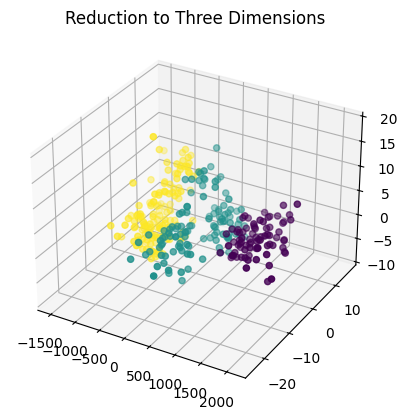

In [15]:
# This will create a 3D scatter plot

fig = plt.figure()

ax = plt.subplot(projection='3d')

ax.scatter(df_three.pca1, df_three.pca2, df_three.pca3, c=df_three.label)

ax.set_title('Reduction to Three Dimensions');


We will now do the same thing, but reduce the number of dimensions down to two

In [16]:
two_d_pca = PCA(n_components=2)
df_two = pd.DataFrame(two_d_pca.fit_transform(ohe_df), columns=['pca1','pca2'])
df_two['label'] = labels

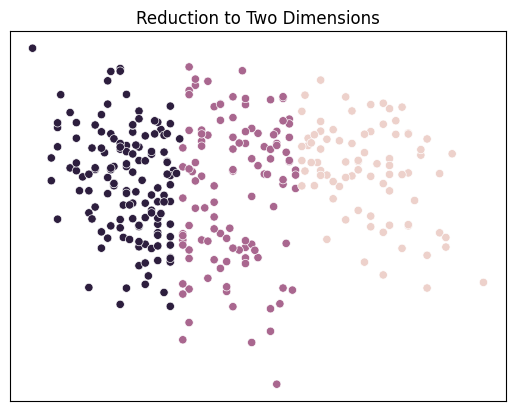

In [17]:
# Using seaborn scatter plot to show two dimensions
fig, ax = plt.subplots(1)
sns.scatterplot(data=df_two, x='pca1',y='pca2',hue='label', ax=ax, legend=False)
ax.set_title('Reduction to Two Dimensions')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False);
